# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [38]:
import cv2
#import imghdr

In [ ]:
#link do data: https://drive.google.com/drive/folders/11MlQrsJU4yypca_X7-R1-iqblhonkVux?usp=sharing
data_dir = 'ImageClassificationData' 

In [40]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [41]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data\happy\depositphotos_125899148-stock-photo-portraits-of-happy-people.jpg
Image not in ext list data\happy\happiness-quotes-gift-trick-expect-delight-comes-charles-dickens-wisdom-quotes.webp
Image not in ext list data\happy\Hunt-for-Happiness-Week-1200x834.jpg
Image not in ext list data\sad\couple-two-sad-and-depressed-footage-171896013_iconl.jpeg
Image not in ext list data\sad\depositphotos_11207956-stock-photo-thoughtful-man-in-the-living.jpg
Image not in ext list data\sad\depositphotos_469568274-stock-photo-group-sad-people-go-social.jpg
Image not in ext list data\sad\depositphotos_9980774-stock-photo-sad-lonely-pensive-old-senior.jpg


# 3. Load Data

Data was collected by downloading images from google using chrome extension: Download All Images.

In [42]:
import numpy as np
from matplotlib import pyplot as plt

In [43]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 363 files belonging to 2 classes.


In [44]:
data_iterator = data.as_numpy_iterator()

In [45]:
batch = data_iterator.next()

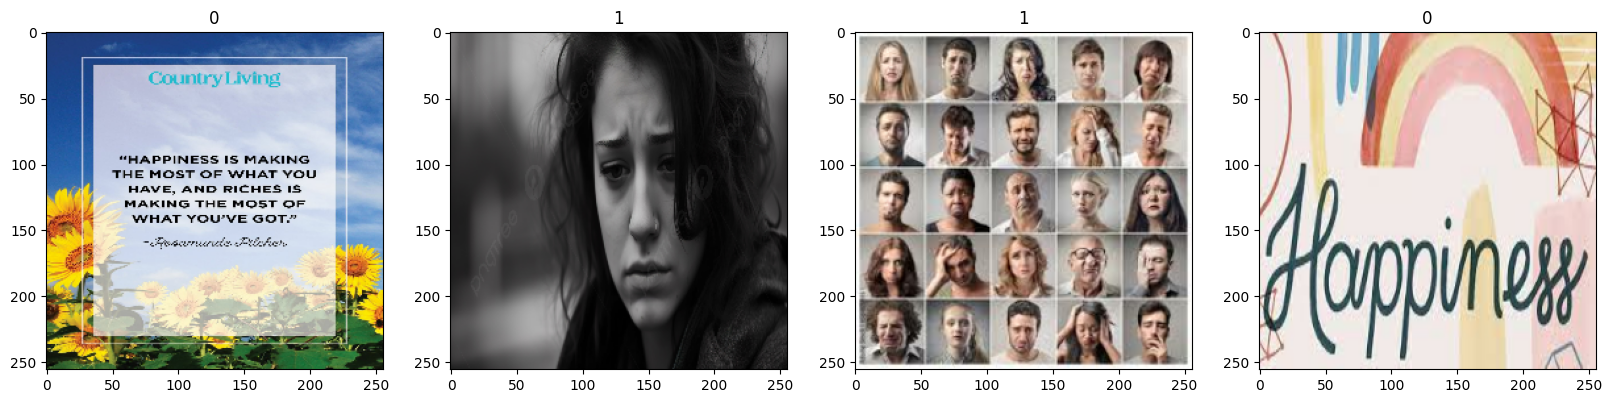

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

Scaled features help in avoiding vanishing or exploding gradients during the backpropagation process, contributing to more stable and efficient training.

In [47]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

# 5. Split Data

1. The training dataset is used to train the machine learning model. During the training phase, the model learns the patterns, relationships, and features present in the data. The model's parameters (weights and biases) are adjusted during training to minimize the difference between its predictions and the actual outcomes in the training data. Hyperparameters, such as learning rates or regularization parameters, are adjusted based on the model's performance on the validation set. This helps prevent overfitting to the training data.
2. The validation dataset is used to fine-tune the model and select hyperparameters. It acts as an unbiased evaluation set to ensure that the model generalizes well to new, unseen data.
3. The test dataset is used to assess the model's performance on completely unseen data. It provides an unbiased estimate of the model's ability to generalize to new instances. The model's final evaluation is conducted on the test set after training and hyperparameter tuning. This step helps estimate how well the model will perform in real-world scenarios.

In [82]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [87]:
train_size+val_size+test_size

12

In [86]:
len(data)

12

In [88]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

- The core building blocks of CNNs are convolutional layers. These layers use convolutional operations to scan input data with small filters or kernels. These filters capture local patterns and hierarchies, preserving the spatial relationships between pixels.
- Filters (or kernels) are small windows that slide over the input data during the convolution operation. Each filter extracts specific features from the input, such as edges, textures, or more complex patterns. The weights of these filters are learned during the training process
- Rectified Linear Unit (ReLU) ReLU introduces non-linearity to the model, which is crucial for the network to learn from and adapt to complex patterns in the data. For any given input x, the output of the ReLU activation is the maximum of x and 0.
- MaxPooling2D operates on 2D input data, it divides the input into non-overlapping rectangular regions (often called pooling windows or kernels).


In [89]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [91]:
model = Sequential()

In [92]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [93]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [95]:
logdir='logs'

In [96]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [97]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 30s 2s/step - loss: 0.7207 - accuracy: 0.5781 - val_loss: 0.6402 - val_accuracy: 0.5469
Epoch 2/20
8/8 [==============================] - 25s 2s/step - loss: 0.5927 - accuracy: 0.5938 - val_loss: 0.4819 - val_accuracy: 0.7656
Epoch 3/20
8/8 [==============================] - 26s 2s/step - loss: 0.5062 - accuracy: 0.7969 - val_loss: 0.4434 - val_accuracy: 0.8438
Epoch 4/20
8/8 [==============================] - 22s 2s/step - loss: 0.3671 - accuracy: 0.8594 - val_loss: 0.6489 - val_accuracy: 0.7031
Epoch 5/20
8/8 [==============================] - 29s 3s/step - loss: 0.4049 - accuracy: 0.7930 - val_loss: 0.2578 - val_accuracy: 0.9219
Epoch 6/20
8/8 [==============================] - 28s 2s/step - loss: 0.2552 - accuracy: 0.9062 - val_loss: 0.2360 - val_accuracy: 0.8906
Epoch 7/20
8/8 [==============================] - 26s 2s/step - loss: 0.2417 - accuracy: 0.8984 - val_loss: 0.1480 - val_accuracy: 0.9375
Epoch 8/20
8/8 [==================

# 8. Plot Performance

1. The loss function is a mathematical function that measures the difference between the predicted output of the model and the actual target values. The goal during training is to minimize this loss, which is achieved by adjusting the model's parameters (weights and biases).
2. Accuracy is the most straightforward metric, measuring the ratio of correctly predicted instances to the total number of instances.

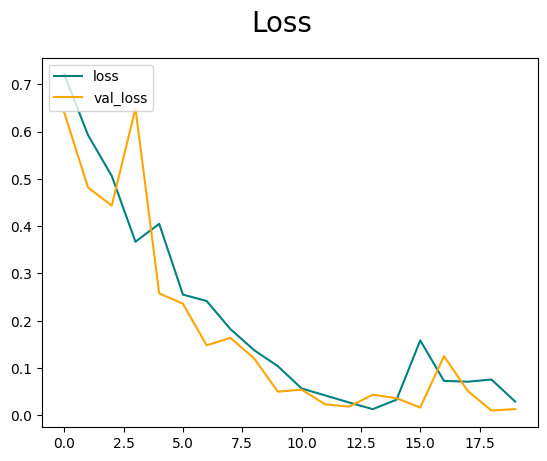

In [98]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

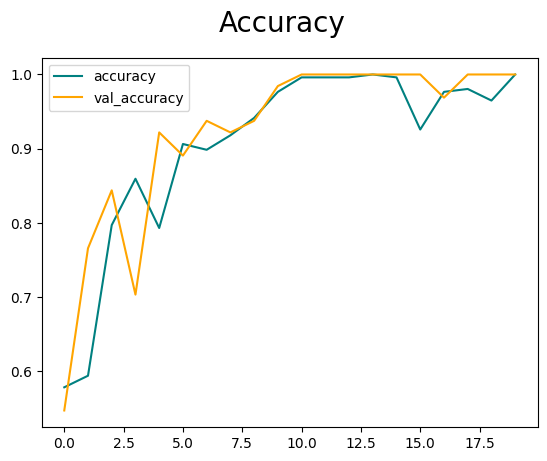

In [99]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [100]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [101]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [102]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 8s 8s/step


In [103]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [104]:
import cv2

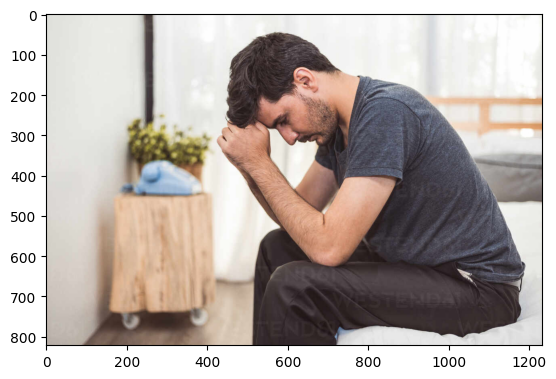

In [106]:
img = cv2.imread('111.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

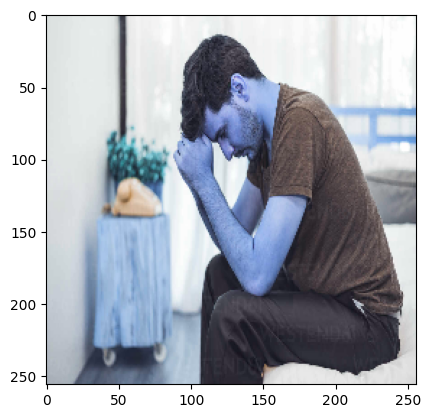

In [107]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [108]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 7s 7s/step


In [109]:
yhat

array([[0.99494475]], dtype=float32)

In [110]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In summary, the Conv2D model successfully learned to categorize images into "sad" and "happy" classes with a high accuracy, showcasing the effectiveness of convolutional neural networks in image classification tasks related to emotional recognition.

# 11. Save the Model

In [111]:
from tensorflow.keras.models import load_model

In [114]:
model.save(os.path.join('models','imageclassifier.keras'))

In [117]:
new_model = load_model('models\imageclassifier.keras')

In [118]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 8s 8s/step


array([[0.99494475]], dtype=float32)